# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных** 
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Импорт библиотек и чтение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

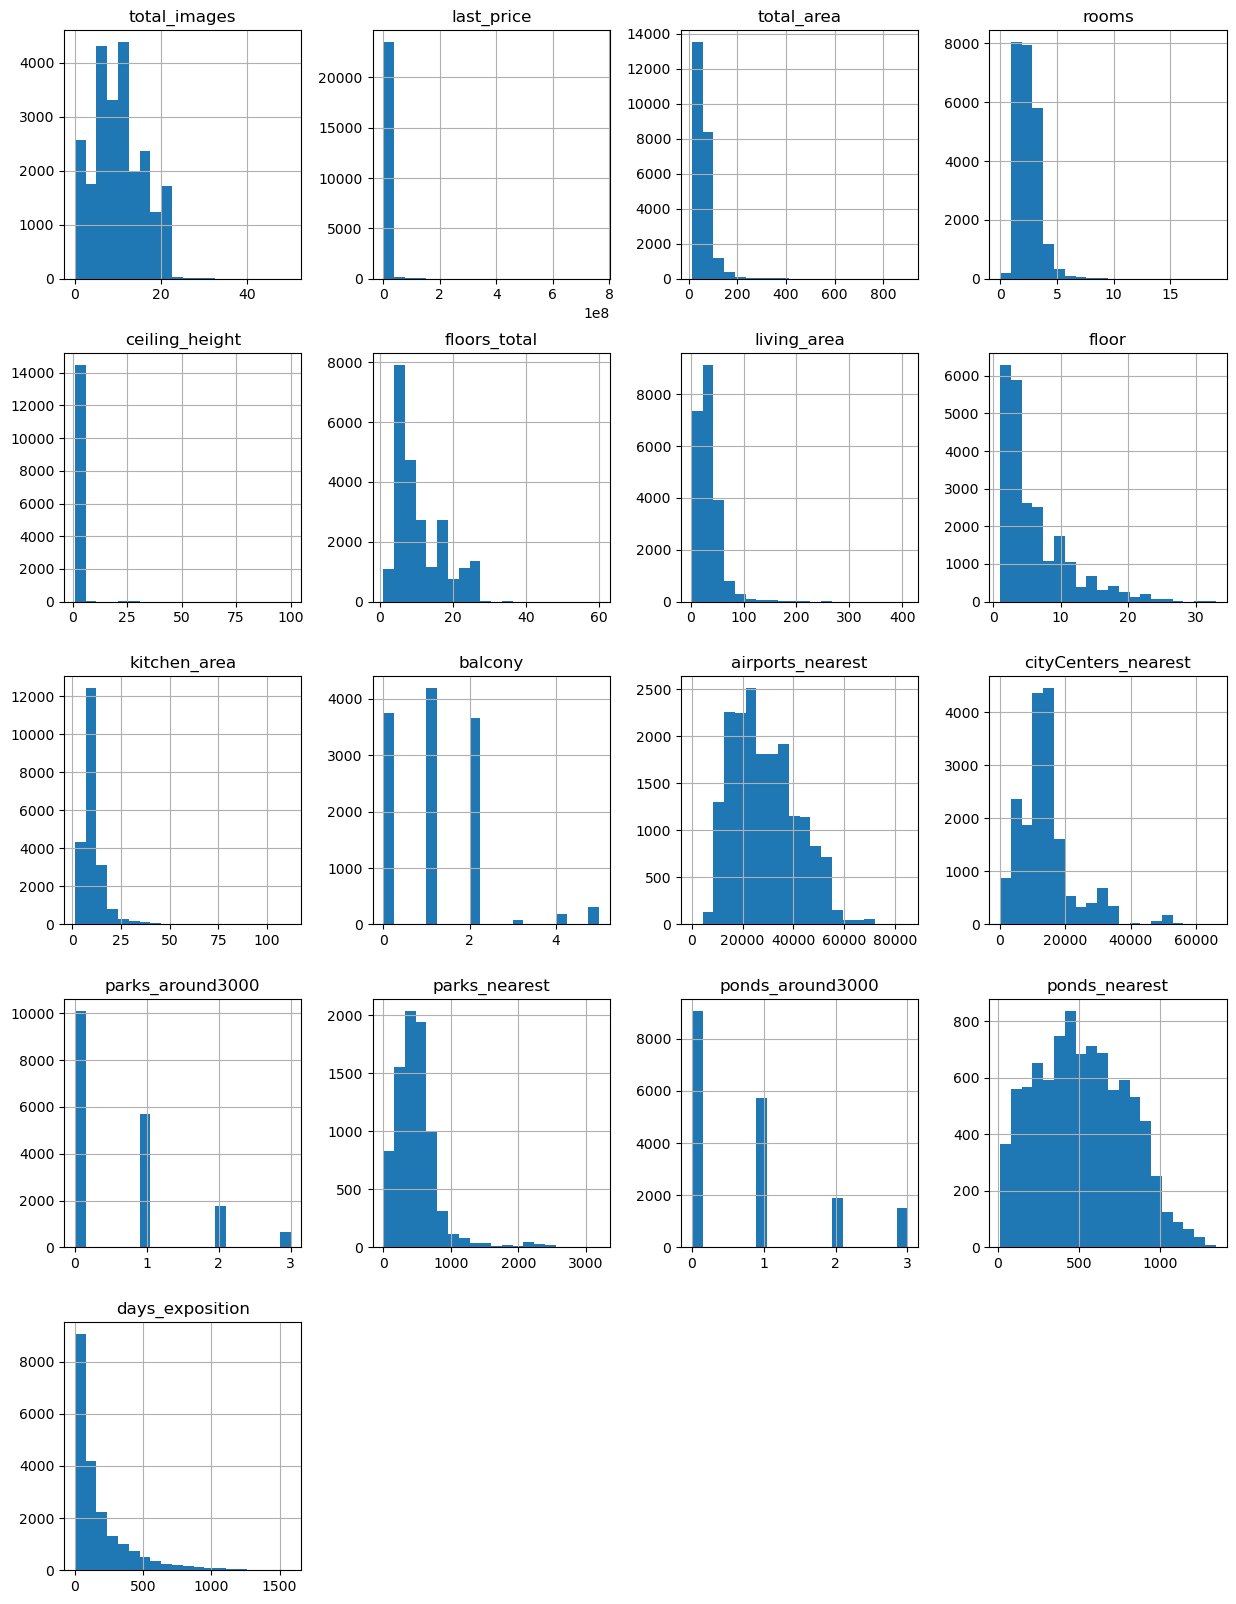

In [4]:
data.hist(bins=20, figsize=(15, 20))
plt.show()

По полученной информации можно судить о том, что данные к работе не готовы:

-Количество пропущенных данных в некоторых столбцах достигает 90%;

-По построенным гистограммам можно судить о том что в данных присутствуют выбросы.

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


Избавимся от выбросов в данных и заполним пропуски там, где это возможно.

**2.1 Число фотографий квартиры в объявлении**

Для total_images объеденим высокие значения в одну группу "20 и более фото" и присвоим значение 20.

In [7]:
for i in range(len(data)):
    if data.loc[i, 'total_images'] > 20:
        try:
            data.loc[i, 'total_images'] = 20
        except:
            pass

**2.2 Цена на момент снятия с публикации**

Рассмотрим разброс цен на квартиру подробнее.

In [8]:
data['last_price_bin'] = pd.cut(data['last_price'], 120)
data.groupby('last_price_bin')['last_price'].agg('count').head(10)

last_price_bin
(-750797.81, 6370421.75]     16998
(6370421.75, 12728653.5]      4938
(12728653.5, 19086885.25]      986
(19086885.25, 25445117.0]      319
(25445117.0, 31803348.75]      158
(31803348.75, 38161580.5]       89
(38161580.5, 44519812.25]       47
(44519812.25, 50878044.0]       34
(50878044.0, 57236275.75]       21
(57236275.75, 63594507.5]       12
Name: last_price, dtype: int64

Ограничим масимальную цену для нашего исследования 25 миллионами рублей, т.к. для предсказания цены на более дорогие квартиры недостаточно данных.

In [9]:
for i in range(len(data)):
    if data.loc[i, 'last_price'] > 2.5e+7:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [10]:
data.reset_index(drop=True, inplace=True)

**2.3 Общая площадь квартиры**

In [11]:
data['total_area_bin'] = pd.cut(data['total_area'], 20)
print(data.groupby('total_area_bin')['total_area'].agg('count'))
data['total_area_bin_min'] = pd.cut(data.query('total_area < 40')['total_area'], 10)
data.groupby('total_area_bin_min')['total_area'].agg('count')

total_area_bin
(11.551, 34.44]      3129
(34.44, 56.88]      10506
(56.88, 79.32]       6077
(79.32, 101.76]      2180
(101.76, 124.2]       744
(124.2, 146.64]       285
(146.64, 169.08]      155
(169.08, 191.52]       75
(191.52, 213.96]       36
(213.96, 236.4]        22
(236.4, 258.84]        13
(258.84, 281.28]        5
(281.28, 303.72]        1
(303.72, 326.16]        5
(326.16, 348.6]         0
(348.6, 371.04]         1
(371.04, 393.48]        0
(393.48, 415.92]        0
(415.92, 438.36]        0
(438.36, 460.8]         1
Name: total_area, dtype: int64


total_area_bin_min
(11.972, 14.79]       6
(14.79, 17.58]        7
(17.58, 20.37]       24
(20.37, 23.16]       71
(23.16, 25.95]      156
(25.95, 28.74]      233
(28.74, 31.53]     1196
(31.53, 34.32]     1405
(34.32, 37.11]     1522
(37.11, 39.9]      1105
Name: total_area, dtype: int64

Ограничим максимальную общую площадь для нашего исследования 150 кв.м., минимальную 28 кв.м.

In [12]:
for i in range(len(data)):
    if data.loc[i, 'total_area'] > 150:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [13]:
data.reset_index(drop=True, inplace=True)

In [14]:
for i in range(len(data)):
    if data.loc[i, 'total_area'] < 28:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [15]:
data.reset_index(drop=True, inplace=True)

**2.4 Число комнат**

In [16]:
data['rooms_bin'] = pd.cut(data['rooms'], 9)
data.groupby('rooms_bin')['rooms'].agg('count')

rooms_bin
(-0.008, 0.889]      64
(0.889, 1.778]     7782
(1.778, 2.667]     7898
(2.667, 3.556]     5628
(3.556, 4.444]      991
(4.444, 5.333]      177
(5.333, 6.222]       24
(6.222, 7.111]        8
(7.111, 8.0]          1
Name: rooms, dtype: int64

Удалим строки с количеством комнат больше 4 и для 0. data.query('rooms == 0')['studio'].value_counts()

In [17]:
for i in range(len(data)):
    if data.loc[i, 'rooms'] > 4:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [18]:
data.reset_index(drop=True, inplace=True)

In [19]:
for i in range(len(data)):
    if data.loc[i, 'rooms'] == 0:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [20]:
data.reset_index(drop=True, inplace=True)

**2.5 Высота потолков**

Изучим все уникальные значения

In [21]:
sorted(data['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.66,
 2.7,
 nan,
 1.2,
 1.75,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.84,
 3.85,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.14,
 4.15,
 4.19,
 4.2,
 4.25,
 4.3,
 4.37,
 4.

Вероятно значения высоты потолков от 20 до 32 м записаны с ошибкой, обработаем данные значения:

In [22]:
for i in range(len(data)):
    if 20 <= data.loc[i, 'ceiling_height'] <= 32:
        data.loc[i, 'ceiling_height'] = data.loc[i, 'ceiling_height']/10

In [23]:
data['ceiling_height_bin'] = pd.cut(data['ceiling_height'], 200)
data.groupby('ceiling_height_bin')['ceiling_height'].agg('count').head(20)

ceiling_height_bin
(0.987, 1.065]     1
(1.065, 1.13]      0
(1.13, 1.195]      0
(1.195, 1.26]      1
(1.26, 1.325]      0
(1.325, 1.39]      0
(1.39, 1.455]      0
(1.455, 1.52]      0
(1.52, 1.585]      0
(1.585, 1.65]      0
(1.65, 1.715]      0
(1.715, 1.78]      1
(1.78, 1.845]      0
(1.845, 1.91]      0
(1.91, 1.975]      0
(1.975, 2.04]     12
(2.04, 2.105]      0
(2.105, 2.17]      0
(2.17, 2.235]      0
(2.235, 2.3]       6
Name: ceiling_height, dtype: int64

Удалим строки с высотой потолков меньше 2.4 м и больше 3.3 м.

In [24]:
for i in range(len(data)):
    if data.loc[i, 'ceiling_height'] > 3.3:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [25]:
data.reset_index(drop=True, inplace=True)

In [26]:
for i in range(len(data)):
    if data.loc[i, 'ceiling_height'] < 2.4:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [27]:
data.reset_index(drop=True, inplace=True)

**2.6 Всего этажей в доме**

Количество этажей в доме (floors_total) не указано всего в 86 объявлениях (менее 1%), удалим пропуски.

In [28]:
data = data.dropna(subset=['floors_total'])

In [29]:
data.reset_index(drop=True, inplace=True)

In [30]:
data['floors_total_bin'] = pd.cut(data['floors_total'], 10)
data.groupby('floors_total_bin')['floors_total'].agg('count')

floors_total_bin
(0.941, 6.9]    7998
(6.9, 12.8]     7091
(12.8, 18.7]    3647
(18.7, 24.6]    1737
(24.6, 30.5]    1313
(30.5, 36.4]      27
(36.4, 42.3]       0
(42.3, 48.2]       0
(48.2, 54.1]       1
(54.1, 60.0]       1
Name: floors_total, dtype: int64

**2.7 Жилая площадь**

In [31]:
data['living_area_bin'] = pd.cut(data['living_area'], 10)
data.groupby('living_area_bin')['living_area'].agg('count')

living_area_bin
(1.874, 14.6]      536
(14.6, 27.2]      7536
(27.2, 39.8]      6654
(39.8, 52.4]      3785
(52.4, 65.0]      1113
(65.0, 77.6]       359
(77.6, 90.2]       115
(90.2, 102.8]       20
(102.8, 115.4]       3
(115.4, 128.0]       2
Name: living_area, dtype: int64

Удалим данные о квартирах с жилой площадью более 80 кв.м.

In [32]:
for i in range(len(data)):
    if data.loc[i, 'living_area'] > 80:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [33]:
data.reset_index(drop=True, inplace=True)

Пропуски в значениях жилой площади (living_area) можно заполнить, используя данные об общей площади квартиры, расчитав ее долю от общей площади для схожих квартир.

In [34]:
data['total_area_bin'] = pd.cut(data['total_area'], 20)
data.groupby('total_area_bin')['living_area'].agg('median')

total_area_bin
(27.878, 34.1]    17.00
(34.1, 40.2]      17.70
(40.2, 46.3]      26.80
(46.3, 52.4]      29.40
(52.4, 58.5]      32.20
(58.5, 64.6]      37.70
(64.6, 70.7]      40.20
(70.7, 76.8]      44.20
(76.8, 82.9]      47.00
(82.9, 89.0]      50.50
(89.0, 95.1]      53.80
(95.1, 101.2]     55.25
(101.2, 107.3]    59.70
(107.3, 113.4]    64.80
(113.4, 119.5]    65.80
(119.5, 125.6]    65.90
(125.6, 131.7]    67.00
(131.7, 137.8]    73.50
(137.8, 143.9]    73.00
(143.9, 150.0]    74.16
Name: living_area, dtype: float64

In [35]:
for i in data['total_area_bin'].unique():
    data.loc[(data['total_area_bin'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area_bin'] == i), 'living_area'].median()

**2.8 Площадь кухни**

Обработаем пропуски аналогично пропускам в столбце жилая площадь.

In [36]:
data['kitchen_area_bin'] = pd.cut(data['kitchen_area'], 10)
data.groupby('kitchen_area_bin')['kitchen_area'].agg('count')

kitchen_area_bin
(1.237, 7.57]      6120
(7.57, 13.84]     11165
(13.84, 20.11]     2080
(20.11, 26.38]      349
(26.38, 32.65]      137
(32.65, 38.92]       62
(38.92, 45.19]       46
(45.19, 51.46]       13
(51.46, 57.73]        2
(57.73, 64.0]         4
Name: kitchen_area, dtype: int64

Удалим данные о квартирах с площадью кухни больше 45 кв.м.

In [37]:
for i in range(len(data)):
    if data.loc[i, 'kitchen_area'] > 80:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [38]:
data.reset_index(drop=True, inplace=True)

In [39]:
data['total_area_bin'] = pd.cut(data['total_area'], 10)
data.groupby('total_area_bin')['kitchen_area'].agg('median')

total_area_bin
(27.878, 40.2]     8.3
(40.2, 52.4]       8.0
(52.4, 64.6]       8.8
(64.6, 76.8]      10.0
(76.8, 89.0]      12.0
(89.0, 101.2]     14.0
(101.2, 113.4]    15.0
(113.4, 125.6]    16.6
(125.6, 137.8]    18.1
(137.8, 150.0]    25.0
Name: kitchen_area, dtype: float64

In [40]:
for i in data['total_area_bin'].unique():
    data.loc[(data['total_area_bin'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area_bin'] == i), 'kitchen_area'].median()

**2.9 Апартаменты** 

Для понимания проверим какие значения содержатся в 10% заполненных строках.

In [41]:
data['is_apartment'].value_counts()

False    2507
True       34
Name: is_apartment, dtype: int64

In [42]:
len(data)

21720

Можно было бы предположить, что пропущенные значения в остальных строках - это False, если почти все заполненные строки имели бы значение True. Но по имеющимся данным зависимость цены на квартиры от этого параметра не предоставляется возможным. Удалим строки со значением True и затем удалим столбец.

In [43]:
for i in range(len(data)):
    if data.loc[i, 'is_apartment'] == True:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [44]:
data.reset_index(drop=True, inplace=True)

In [45]:
data.drop('is_apartment', axis= 1 , inplace= True)

**2.10 Число балконов**

Количество балконов не указано почти в половине объявлений, скорее всего для тех квартир, где балконов нет, заполним пропущенные значения.

In [46]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

**2.11 Населенный пункт**

Может сильно влиять на стоимость квартиры. В таблице всего 49 объявлений с неуказанным местонахождением, исключим данные из таблицы.

In [47]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [48]:
data.reset_index(drop=True, inplace=True)

Приведем дубликаты наименований к общему виду.

In [49]:
len(data['locality_name'].unique())

359

In [50]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', ''], 'поселок', regex=True)
)
len(data['locality_name'].unique())

317

**2.12 Расстояние до аэропорта**
Не указано почти в четверти объявлений. Оно расчитывается автоматически, поэтому будем считать, что аэропорта поблизости нет. Подтвердим теорию на Питере.

In [51]:
print('Квартир в Питере с неуказанным расстоянием до аэропорта', 
      len(data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == 'санкт-петербург'), ['locality_name']]))
print('Квартир в Питере с указанным расстоянием до аэропорта', 
      len(data.loc[(data['airports_nearest'].isna()==False) & (data['locality_name'] == 'санкт-петербург'), ['locality_name']]))

Квартир в Питере с неуказанным расстоянием до аэропорта 0
Квартир в Питере с указанным расстоянием до аэропорта 0


**2.13 Расстояние до центра**

Вероятнее всего оно не указано для небольших населенных пунктов. Подтвердим теорию на Питере.

In [52]:
print('Квартир в Питере с неуказанным расстоянием до центра', 
      len(data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == 'санкт-петербург'), ['locality_name']]))
print('Квартир в Питере с указанным расстоянием до центра', 
      len(data.loc[(data['cityCenters_nearest'].isna()==False) & (data['locality_name'] == 'санкт-петербург'), ['locality_name']]))

Квартир в Питере с неуказанным расстоянием до центра 0
Квартир в Питере с указанным расстоянием до центра 0


**2.14 Парки поблизости**

Рассмотрим parks_around3000 и parks_nearest совместно.

In [53]:
print(data['parks_around3000'].value_counts())
print(data['parks_around3000'].isna().sum())
print(data['parks_nearest'].isna().sum())

0.0    9420
1.0    5113
2.0    1439
3.0     452
Name: parks_around3000, dtype: int64
5218
14635


Сумма пропусков в столбце с количеством ближайших парков и количества указанных парков "0" примерно равняется сумме пропусков в столбце с расстоянием до ближайшего парка. Из этого следует, что пропущенные значения в столбце parks_around3000 можно заполнить значением "0", а в столбце parks_nearest пропуски оставить, т.к. парков поблизости нет.

In [54]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isna().sum()

0

**2.14 Водоемы поблизости**

Аналогично поступим с информацией об озерах (ponds_around3000 и ponds_nearest)

In [55]:
print(data['ponds_around3000'].value_counts())
print(data['ponds_around3000'].isna().sum())
print(data['ponds_nearest'].isna().sum())

0.0    8510
1.0    5111
2.0    1647
3.0    1156
Name: ponds_around3000, dtype: int64
5218
13728


In [56]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].isna().sum()

0

**2.15 Сколько дней было размещено объявление (от публикации до снятия)**

Оставим пропуски в столбце days_exposition.

**2.16 Студии**

In [57]:
data['studio'].value_counts()

False    21637
True         5
Name: studio, dtype: int64

Удалим данные о кварирах-студиях и столбец с данным параметром

In [58]:
for i in range(len(data)):
    if data.loc[i, 'studio'] == True:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [59]:
data.drop('studio', axis= 1 , inplace= True)

**2.17 Удалим вспомогательные введенные столбцы**

In [60]:
data.drop(['last_price_bin', 'total_area_bin', 'total_area_bin_min', 
          'rooms_bin', 'ceiling_height_bin', 'floors_total_bin',
          'living_area_bin', 'kitchen_area_bin'], axis= 1 , inplace= True)

In [61]:
data.reset_index(drop=True, inplace=True)

In [62]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8496
floors_total                0
living_area                 0
floor                       0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5235
cityCenters_nearest      5217
parks_around3000            0
parks_nearest           14630
ponds_around3000            0
ponds_nearest           13725
days_exposition          2772
dtype: int64

Для дальнейшей работы с датой публикации изменим формат столбца first_day_exposition в формат datetime, форматы столбцов floors_total и balcony в int.

In [63]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [64]:
data['floors_total'] = data['floors_total'].astype('int')

In [65]:
data['balcony'] = data['balcony'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21637 entries, 0 to 21636
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21637 non-null  int64         
 1   last_price            21637 non-null  float64       
 2   total_area            21637 non-null  float64       
 3   first_day_exposition  21637 non-null  datetime64[ns]
 4   rooms                 21637 non-null  int64         
 5   ceiling_height        13141 non-null  float64       
 6   floors_total          21637 non-null  int32         
 7   living_area           21637 non-null  float64       
 8   floor                 21637 non-null  int64         
 9   open_plan             21637 non-null  bool          
 10  kitchen_area          21637 non-null  float64       
 11  balcony               21637 non-null  int32         
 12  locality_name         21637 non-null  object        
 13  airports_nearest

Проверим датафрейм на явные дубликаты

In [66]:
data.duplicated().sum()

0

**Вывод**

В ходе предобработки данных:

* Заполнены пропуски в данных там, где это возможно;
* Удалены строки и столбцы с пропусками, влияющими на анализ;
* Изменены типы данных, там где это необходимо, для последующей работой с датафреймом.

В ходе предобработки было удалено около 9% строк (сталось 21637 из 23699) 

### Добавление новых стобцов

**3.1 Цена одного квадратного метра**

Добавим столбец со стоимостью одного квадратного метра для каждого объекта.

In [67]:
data['square_meter_price'] = round((data['last_price'] / data['total_area']), 2)

**3.2 Время публикации объявления**

Добавим столбцы с днем недели, месяцем и годом публикации объявлений для каждого объекта.

In [68]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [69]:
data['month'] = data['first_day_exposition'].dt.month

In [70]:
data['year'] = data['first_day_exposition'].dt.year

**3.3 Тип этажа квартиры**

Добавим столбец с типом этажа квартиры «первый», «последний» и «другой» для каждого объекта.

In [71]:
def floor_type(floor, floors_total):
    try:
        if floor == 1:
            return 'первый'
        elif floor < floors_total:
            return 'другой'
        elif floor == floors_total:
            return 'последний'
    except:
        pass
for i in range(len(data)):
    data.loc[i, 'floor_type'] = floor_type(data.loc[i, 'floor'], data.loc[i, 'floors_total'])

**3.4 Расстояние до центра**

Добавим столбец с расстоянием до центра населенного пункта в километрах для каждого объекта.

In [72]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000, 0)

### Исследовательский анализ данных

Аномальные значения были обработаны во втором пункте. Проверим повторно и удалим пропущенные.

**4.1 Общая площадь**

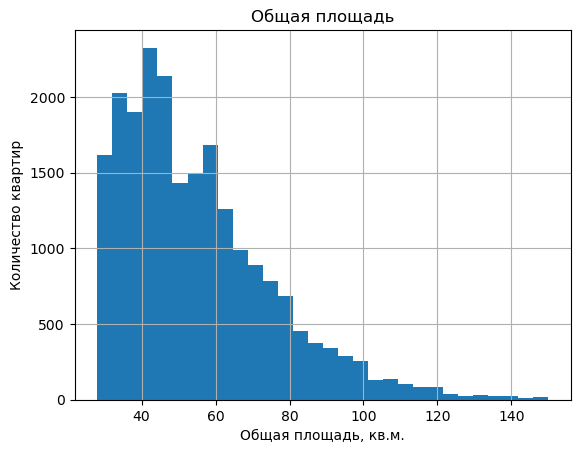

In [73]:
data['total_area'].hist(bins=30)
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Количество квартир')
plt.title('Общая площадь')
plt.show()

Основная масса квартир имеет площадь до 60 квадратных метров.

**4.2 Жилая площадь**

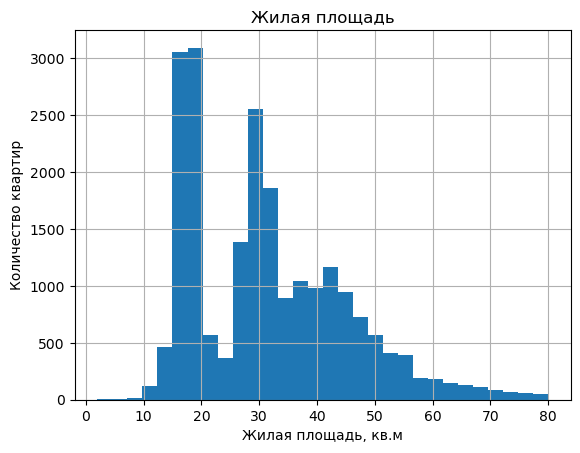

In [74]:
data['living_area'].hist(bins=30)
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество квартир')
plt.title('Жилая площадь')
plt.show()

Удалим строки со значением жилой площади менее 10 квадратных метров.

In [75]:
for i in range(len(data)):
    if data.loc[i, 'living_area'] <= 10:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [76]:
data.reset_index(drop=True, inplace=True)

Значения жилой площади имеют 2 пика: больше всего квартир с жилой площадью 15-20 и около 30 квадратных метров.

**4.3 Площадь кухни**

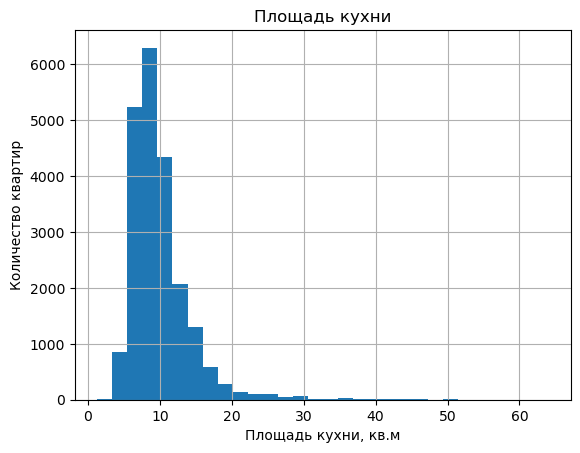

In [77]:
data['kitchen_area'].hist(bins=30)
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Количество квартир')
plt.title('Площадь кухни')
plt.show()

In [78]:
len(data.query('kitchen_area > 30'))

150

Удалим строки со значением площади кухни более 30 квадратных метров.

In [79]:
for i in range(len(data)):
    if data.loc[i, 'kitchen_area'] >= 30:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [80]:
data.reset_index(drop=True, inplace=True)

Чаще всего площадь кухни в квартире составляет от 5 до 15 квадратных метров.

**4.4 Цена объекта**

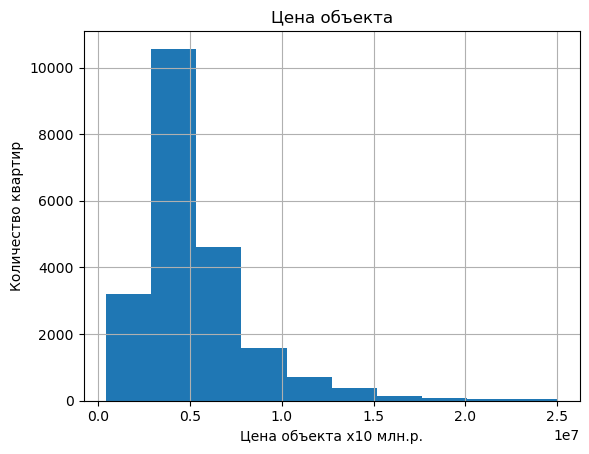

In [81]:
data['last_price'].hist()
plt.xlabel('Цена объекта х10 млн.р.')
plt.ylabel('Количество квартир')
plt.title('Цена объекта')
plt.show()

In [82]:
len(data.query('last_price > 2e+7'))

99

Удалим строки с ценой более 20 млн.р.

In [83]:
for i in range(len(data)):
    if data.loc[i, 'last_price'] >= 2e+7:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [84]:
data.reset_index(drop=True, inplace=True)

Стоимость бо́льшей части квартир составляет от 2,5 до 7,5 млн.р.

**4.5 Количество комнат**

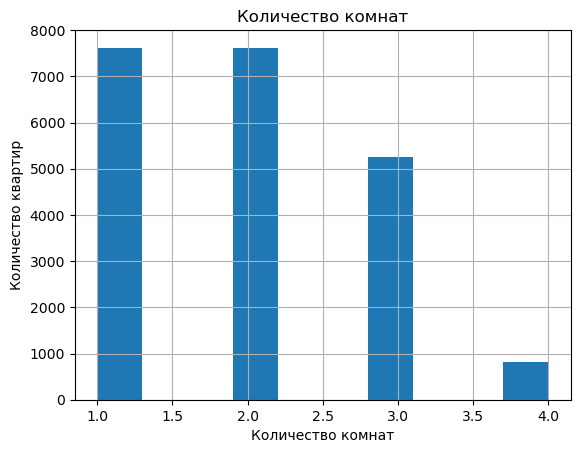

In [85]:
data['rooms'].hist()
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Количество комнат')
plt.show()

Чаще всего встречаются 1- и 2-комнатные квартиры, немного реже - 3-комнатные. Квартиры с количеством комнат больше 3-х встречаются очень редко.

**4.6 Высота потолков**

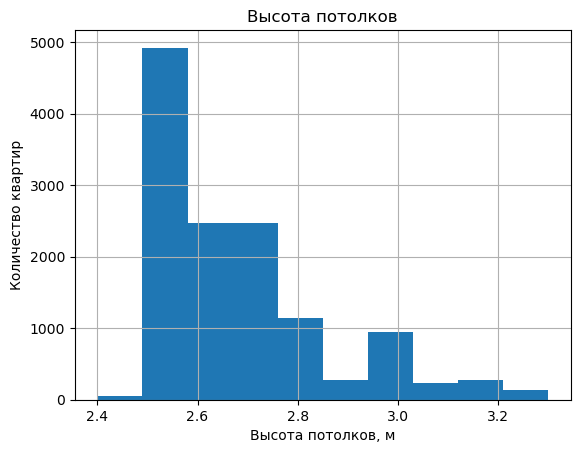

In [86]:
data['ceiling_height'].hist()
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')
plt.title('Высота потолков')
plt.show()

In [87]:
len(data.query('ceiling_height == 2.4'))

22

Удалим данные о квартирах с высотой потолков 2,4 м

In [88]:
for i in range(len(data)):
    if data.loc[i, 'ceiling_height'] == 2.4:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [89]:
data.reset_index(drop=True, inplace=True)

Средняя высота потолков в квартирах от 2,4 до 3 м.

**4.7 Тип этажа квартиры («первый», «последний», «другой»)**

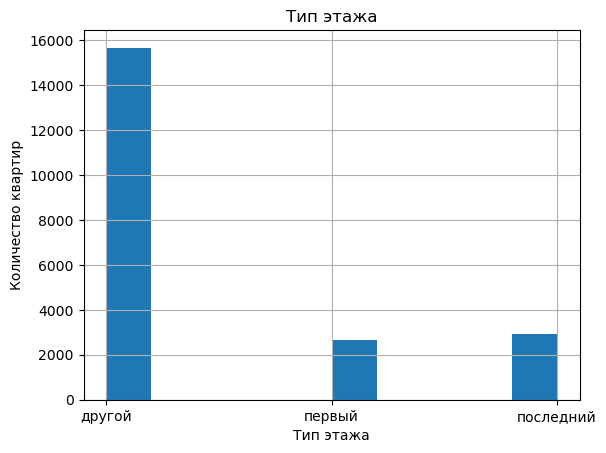

In [90]:
data['floor_type'].hist()
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.title('Тип этажа')
plt.show()

Ошибок в данных не наблюдается, первых и последних этажей примерно одинаковое количество, "других" - больше.

**4.8 Общее количество этажей в доме**

In [91]:
data['floors_total'].max()

60

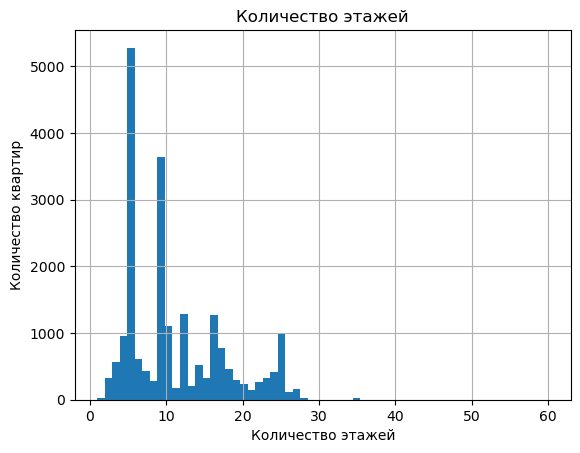

In [92]:
data['floors_total'].hist(bins=60)
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.title('Количество этажей')
plt.show()

In [93]:
for i in range(len(data)):
    if data.loc[i, 'floors_total'] >= 28:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [94]:
data.reset_index(drop=True, inplace=True)

В основном квартиры продаются в 5-и и 9-и этажных домах, скорее всего из-за того что таких домов построено больше всего.

**4.9 Расстояние до центра города в метрах**

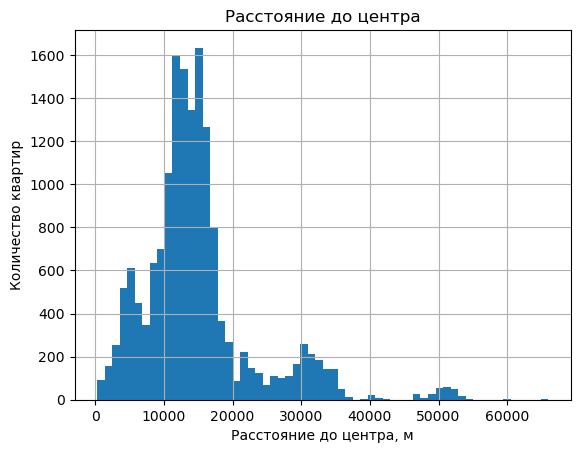

In [95]:
data['cityCenters_nearest'].hist(bins=60)
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Количество квартир')
plt.title('Расстояние до центра')
plt.show()

Удалим данные о квартирах с расстоянием до центра более 55 км.

In [96]:
for i in range(len(data)):
    if data.loc[i, 'cityCenters_nearest'] >= 55000:
        try:
            data = data.drop(labels = i)
        except:
            pass

In [97]:
data.reset_index(drop=True, inplace=True)

Основная масса квартир располагается в 10-15 км от центра.

**4.10 Расстояние до ближайшего парка**

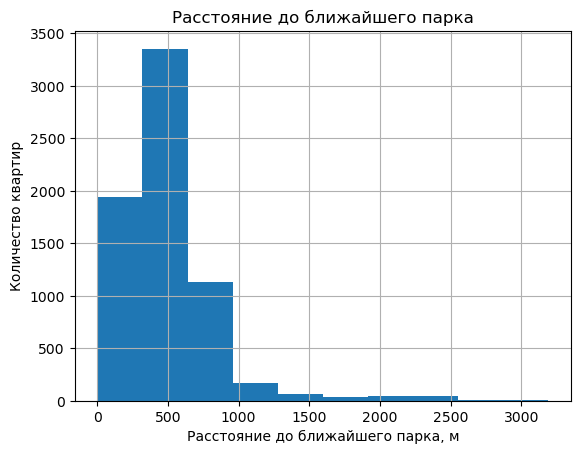

In [98]:
data['parks_nearest'].hist()
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Количество квартир')
plt.title('Расстояние до ближайшего парка')
plt.show()

Объеденим данные о квартирах с расстоянием до парка более 1000 м в одну группу.

In [99]:
for i in range(len(data)):
    if data.loc[i, 'parks_nearest'] >= 1000:
        try:
            data.loc[i, 'parks_nearest'] = 1000
        except:
            pass

Большинство квартир расположено не дальше, чем в 1 км. от парка

**4.11 Время публикации объявлений**

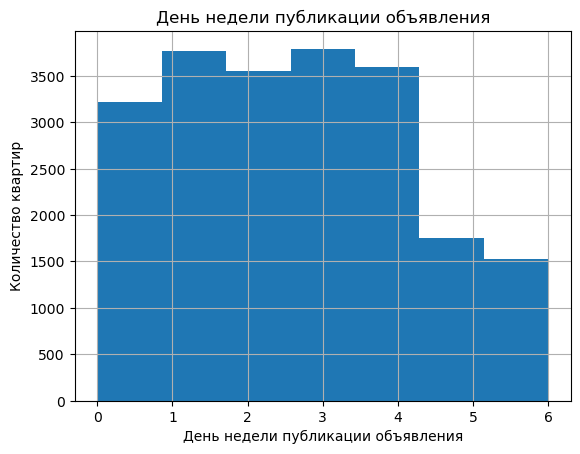

In [100]:
data['weekday'].hist(bins=7)
plt.xlabel('День недели публикации объявления')
plt.ylabel('Количество квартир')
plt.title('День недели публикации объявления')
plt.show()

Объявления чаще публикуются в будние дни

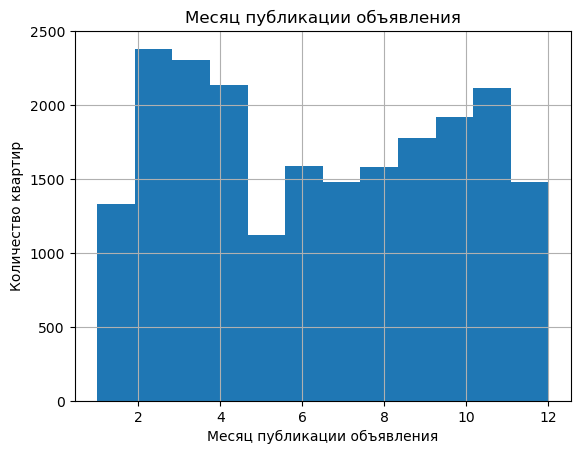

In [101]:
data['month'].hist(bins=12)
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество квартир')
plt.title('Месяц публикации объявления')
plt.show()

Чаще квартиры выставляют на продажу с февраля по апрель. Меньше всего объявлений публикуется в мае и затем идет плавный рост количества публикаций до конца осени. В декабре и январе показатель падает практически до уровня показателя в мае.

**4.12 Скорость продажи квартр**

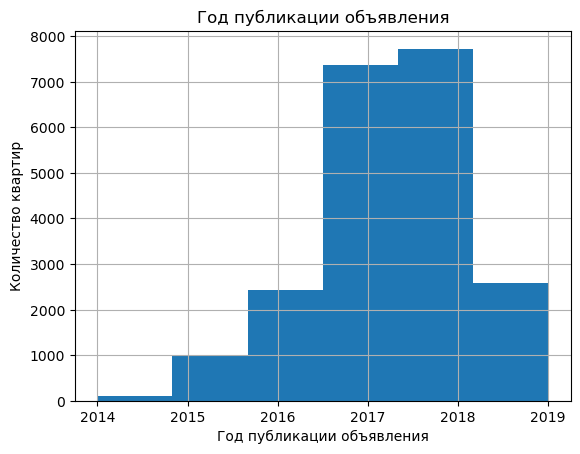

In [102]:
data['year'].hist(bins=6)
plt.xlabel('Год публикации объявления')
plt.ylabel('Количество квартир')
plt.title('Год публикации объявления')
plt.show()

Объем рынка квартир по годам изменяется, вероятно, в связи с экономической ситуацией.

**4.12 Скорость продажи квартр**

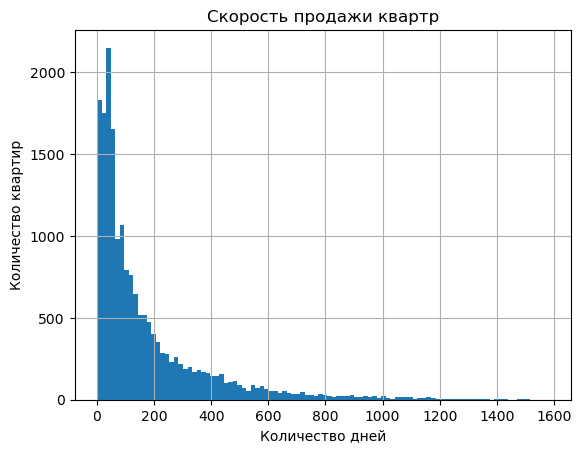

In [103]:
data['days_exposition'].hist(bins=100)
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.title('Скорость продажи квартр')
plt.show()

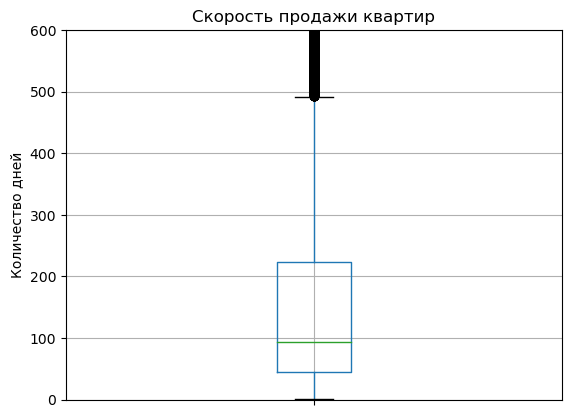

In [104]:
plt.ylim(0, 600)
ax = data.boxplot(column='days_exposition')

ax.set_xticklabels([])

plt.title('Скорость продажи квартир')
plt.ylabel('Количество дней')

plt.show()

In [105]:
data['days_exposition'].describe()

count    18548.000000
mean       175.531917
std        213.594541
min          1.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются за 3 месяца. Нормальными можно считать продажи, длящиеся от 44 до 223 дней. Быстрые продажи происходят быстрее 44 дней, медленные - дольше 223 дней. 

**4.13 Зависимость цены от общей площади**

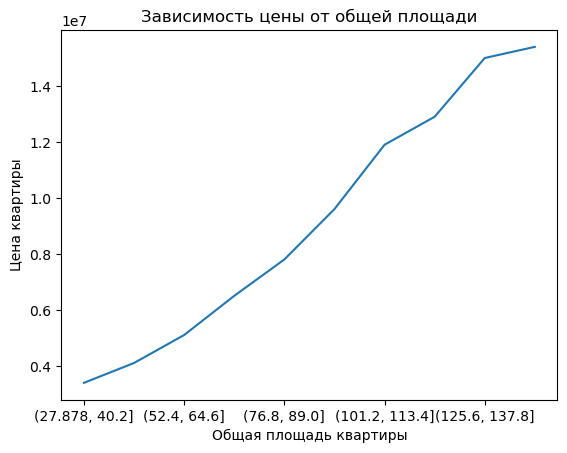

In [106]:
data['total_area_bin'] = pd.cut(data['total_area'], 10)

pivot_table = data.pivot_table(index='total_area_bin', values='last_price', aggfunc='median')

pivot_table.plot(title='Зависимость цены от общей площади', legend=False)

plt.xlabel('Общая площадь квартиры')
plt.ylabel('Цена квартиры')

plt.show()

В среднем цена на квартиру растет вместе с ее общей площадью.

**4.14 Зависимость цены от жилой площади**

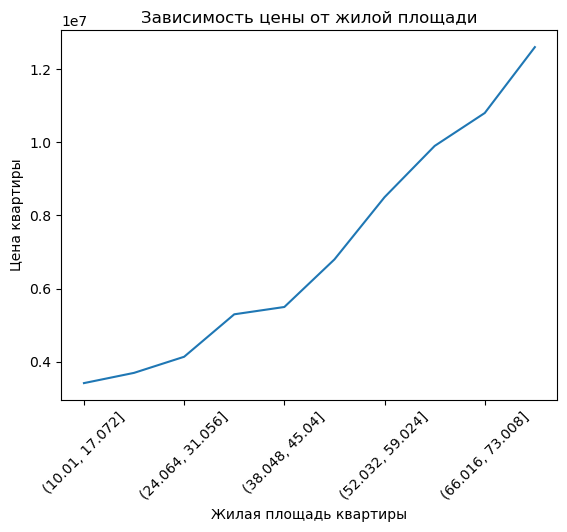

In [107]:
data['living_area_bin'] = pd.cut(data['living_area'], 10)

pivot_table = data.pivot_table(index='living_area_bin', values='last_price', aggfunc='median')

pivot_table.plot(title='Зависимость цены от жилой площади', legend=False)

plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Цена квартиры')
plt.xticks(rotation=45)

plt.show()

В среднем цена на квартиру растет вместе с ее жилой площадью.

**4.15 Зависимость цены от площади кухни**

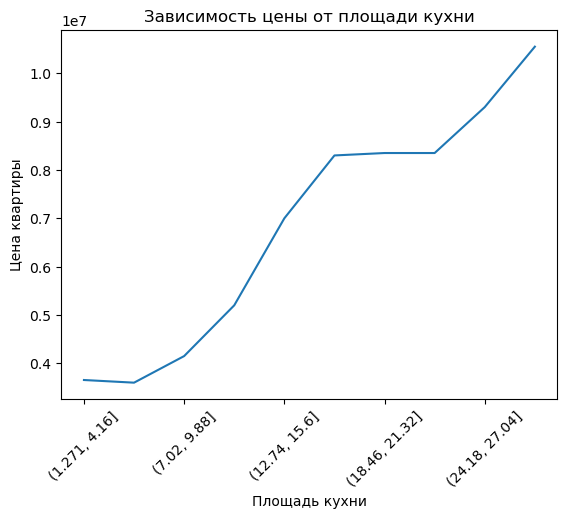

In [108]:
data['kitchen_area_bin'] = pd.cut(data['kitchen_area'], 10)

pivot_table = data.pivot_table(index='kitchen_area_bin', values='last_price', aggfunc='median')

pivot_table.plot(title='Зависимость цены от площади кухни', legend=False)

plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры')
plt.xticks(rotation=45)

plt.show()

В среднем цена на квартиру растет вместе с ее площадью кухни.

**4.16 Зависимость цены от количества комнат**

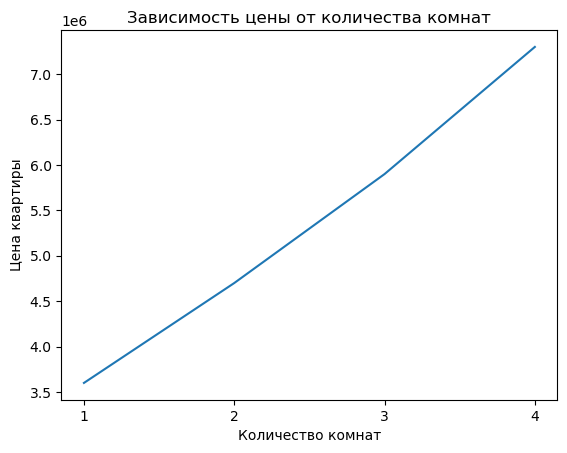

In [109]:
pivot_table = data.pivot_table(index='rooms', values='last_price', aggfunc='median')

pivot_table.plot()

plt.xlabel('Количество комнат')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены от количества комнат')
plt.legend().remove()
plt.xticks(ticks=pivot_table.index)

plt.show()

Цена на квартиру растет вместе с количеством комнат в ней.

**4.17 Зависимость цены от этажа**

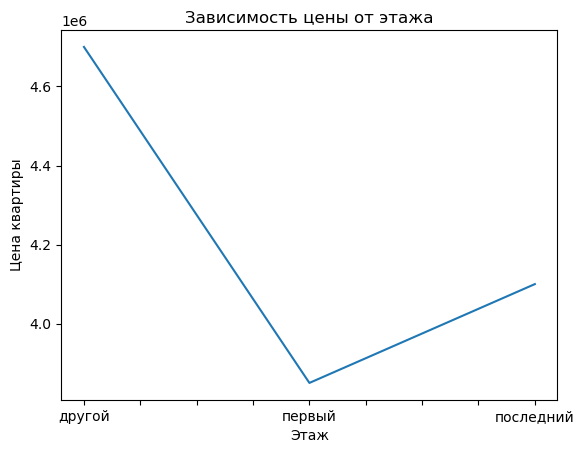

In [110]:
pivot_table = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

pivot_table.plot()

plt.xlabel('Этаж')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены от этажа')
plt.legend().remove()

plt.show()

Дешевле всего квартиры на крайних этажах, особенно на первом.

**4.18 Зависимость цены от даты размещения**

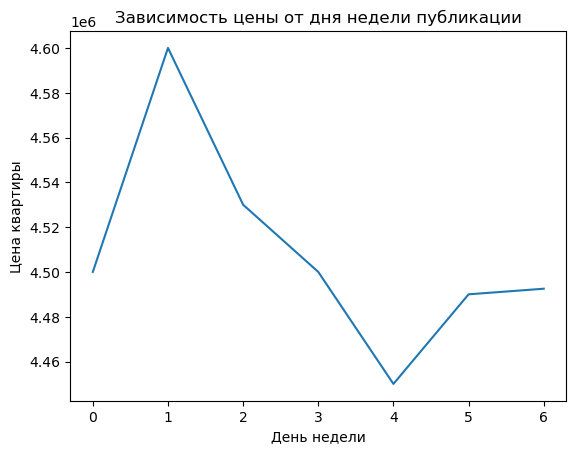

In [111]:
pivot_table = data.pivot_table(index='weekday', values='last_price', aggfunc='median')

pivot_table.plot()

plt.xlabel('День недели')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены от дня недели публикации')
plt.legend().remove()
plt.xticks(ticks=pivot_table.index)

plt.show()

Зависимость цены от дня недели: падает со среды до пятницы, растет с субботы по вторник.

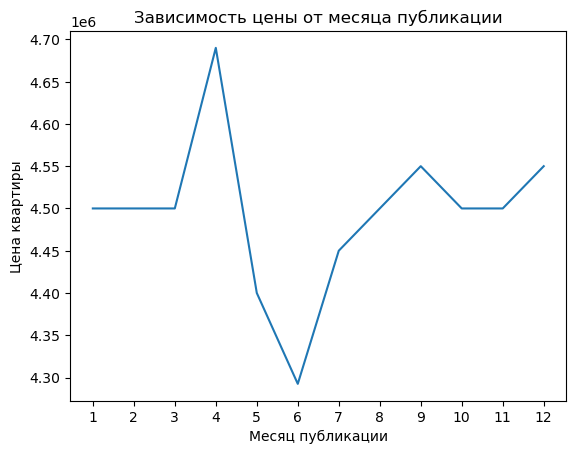

In [112]:
pivot_table = data.pivot_table(index='month', values='last_price', aggfunc='median')

pivot_table.plot()

plt.xlabel('Месяц публикации')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены от месяца публикации')
plt.legend().remove()
plt.xticks(ticks=pivot_table.index)

plt.show()

Зависимость цены от месяца: держится примерно на одном уровне с января до марта и с сентября до конца года. Достигает максимума в апреле, резко падает до июня.

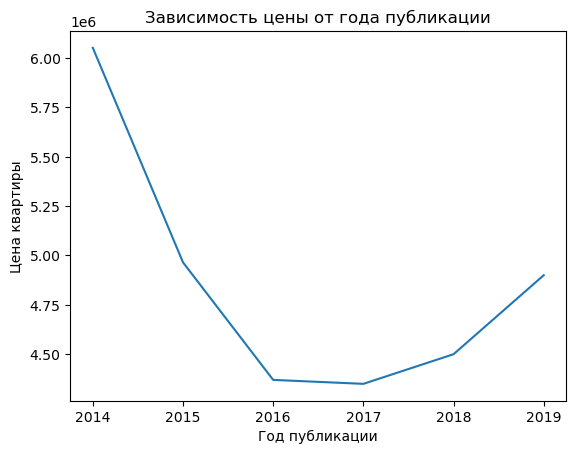

In [113]:
pivot_table = data.pivot_table(index='year', values='last_price', aggfunc='median')

pivot_table.plot()

plt.xlabel('Год публикации')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены от года публикации')
plt.legend().remove()
plt.xticks(ticks=pivot_table.index)

plt.show()

Зависимость цены от года: спад цены до 2016 г., выходит на плато с 2016 по 2017 и далее растет.

**4.19 Стоимость квадратного метра**

In [114]:
data_sqm = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'median'])
data_sqm.columns = ['count', 'median']
data_sqm = data_sqm.sort_values(by='count', ascending=False)
data_sqm = data_sqm.head(10)
data_sqm

,count,median
locality_name,,
Санкт-Петербург,13728,103000.000
поселок Мурино,479,83018.870
поселок Шушары,425,76666.670
Всеволожск,380,65667.560
Пушкин,334,99016.610
Колпино,330,74723.745
поселок Парголово,315,91642.860
Гатчина,303,67924.530
деревня Кудрово,263,91155.490


In [115]:
data_sqm.reset_index(inplace=True)

In [116]:
print('Населенный пункт с самой низкой стоимостью квадратного метра:', 
      data_sqm.loc[(data_sqm['median'] == data_sqm['median'].min())]['locality_name'].iloc[0])
print('Населенный пункт с самой высокой стоимостью квадратного метра:', 
      data_sqm.loc[(data_sqm['median'] == data_sqm['median'].max())]['locality_name'].iloc[0])

Населенный пункт с самой низкой стоимостью квадратного метра: Выборг
Населенный пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург


**4.20 Cредняя цена каждого километра**

Подготовим таблицу с данными для Санкт-Петербурга

In [117]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb['cityCenters_nearest'].isna().sum()

39

In [118]:
data_spb = data_spb.dropna(subset=['cityCenters_nearest'])

In [119]:
data_spb.reset_index(drop=True, inplace=True)

In [120]:
data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
cityCenters_nearest_km,,
0.0,7200000.0,6
1.0,8650000.0,98
2.0,8490000.0,155
3.0,7500000.0,219
4.0,7800000.0,454
5.0,8000000.0,611
6.0,7500000.0,443
7.0,6700000.0,307


Исходя из количества данных ограничим рассматриваемое расстояние от 1 км до 19 км.

In [121]:
for i in range(len(data_spb)):
    if data_spb.loc[i, 'cityCenters_nearest_km'] > 19 or data_spb.loc[i, 'cityCenters_nearest_km'] < 1:
        try:
            data_spb = data_spb.drop(labels = i)
        except:
            pass

In [122]:
data_spb.reset_index(drop=True, inplace=True)

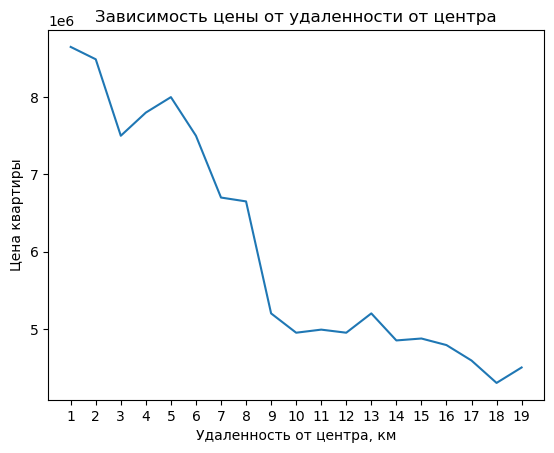

In [123]:
pivot_table = data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')

pivot_table.plot()

plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены от удаленности от центра')
plt.legend().remove()
plt.xticks(ticks=pivot_table.index)

plt.show()

In [124]:
'Средняя стоимость километра для выбранного диапазона:', round((8650000-4500000)/18, 0)

('Средняя стоимость километра для выбранного диапазона:', 230556.0)

Чем ближе квартира к центру города - тем она дороже.

### Общий вывод

1. Стоимость квартиры растет с ростом площади (общей, жилой, площади кухни) и  количества комнат.
2. Дешевле всего квартиры на крайних этажах, особенно на первом.
3. Прослеживается зависимость цен на квартиры от времени размещения объявления:
* Зависимость цены от дня недели: падает со среды до пятницы, растет с субботы по вторник.
* Зависимость цены от месяца: держится примерно на одном уровне с января до марта и с сентября до конца года. Достигает максимума в апреле, резко падает до июня.
* Зависимость цены от года: спад цены до 2016 г., выходит на плато с 2016 по 2017 и растет до 2019.
4. Населенный пункт с самой низкой стоимостью квадратного метра - Выборг, 57,6 т.р./кв.м.
5. Населенный пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург, 103 т.р./кв.м.
6. Средняя стоимость каждого километра до центра в Санкт-Петербурге 230 т.р.